In [40]:
# All Libary
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('/content/drive/MyDrive/ML/Lab 6/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Checking all data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
# As Experience has some Negative value we need to treat this.
df.query('Experience < 0')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.200000,1,0,0,1,0,0,1


In [12]:
# Lots of value is negetive in Experience. We can not remove it. Instead we are replaceing it to Postive,
df['Experience']=df['Experience'].apply(lambda x :abs(x))

In [13]:
# Chekcing for Negative Value
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>,
        <Axes: title={'center': 'CD Account'}>],
       [<Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >]],
      dtype=object)

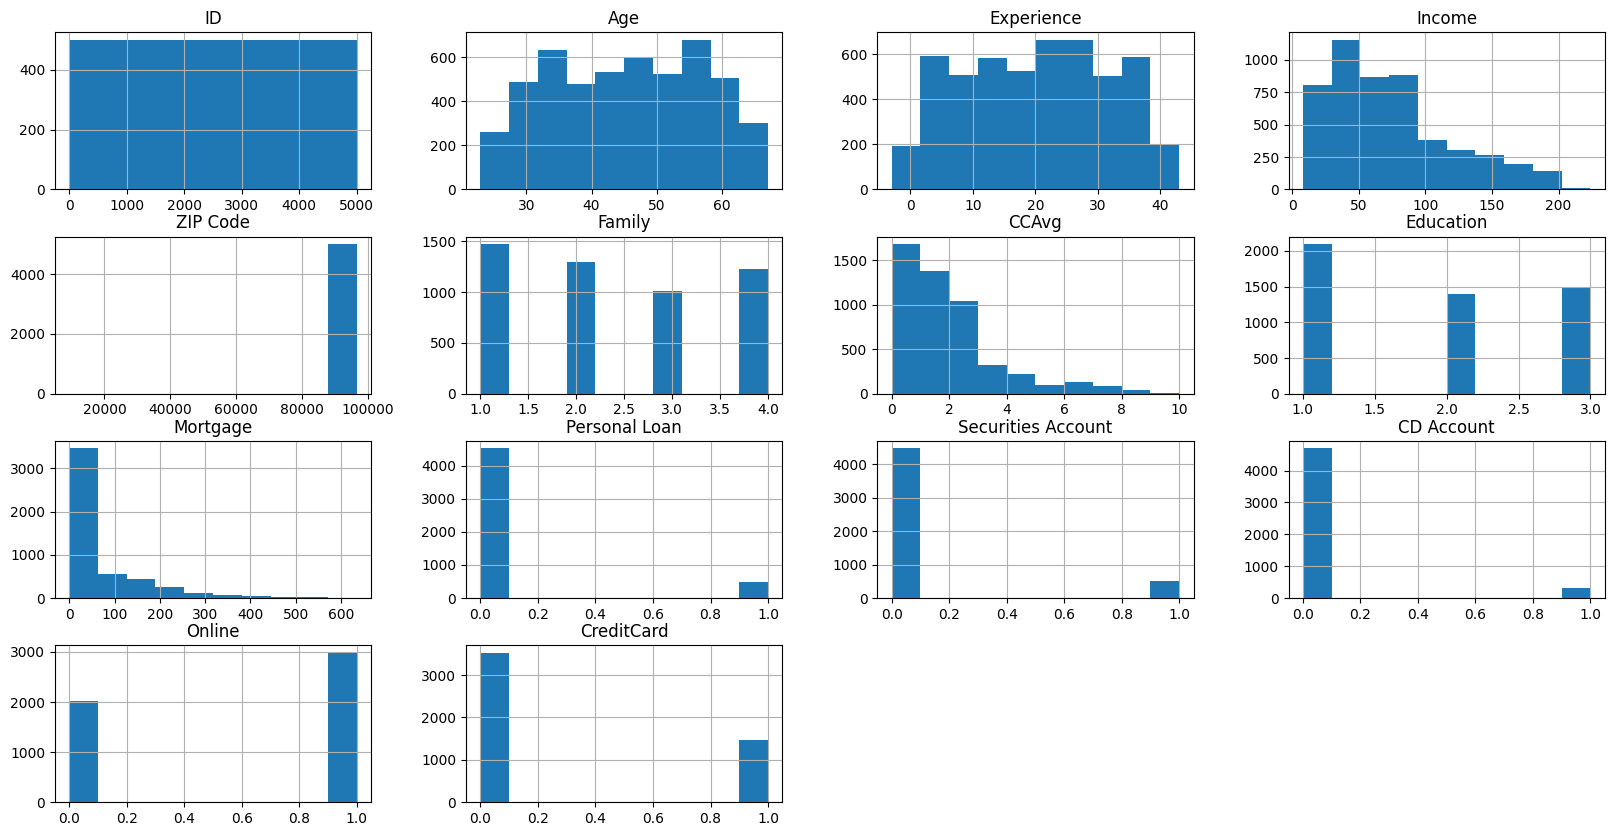

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

In [14]:
df.isnull().sum()
# No null value

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
# Checking for duplicates Value
df.duplicated().value_counts()

False    5000
dtype: int64

<Axes: >

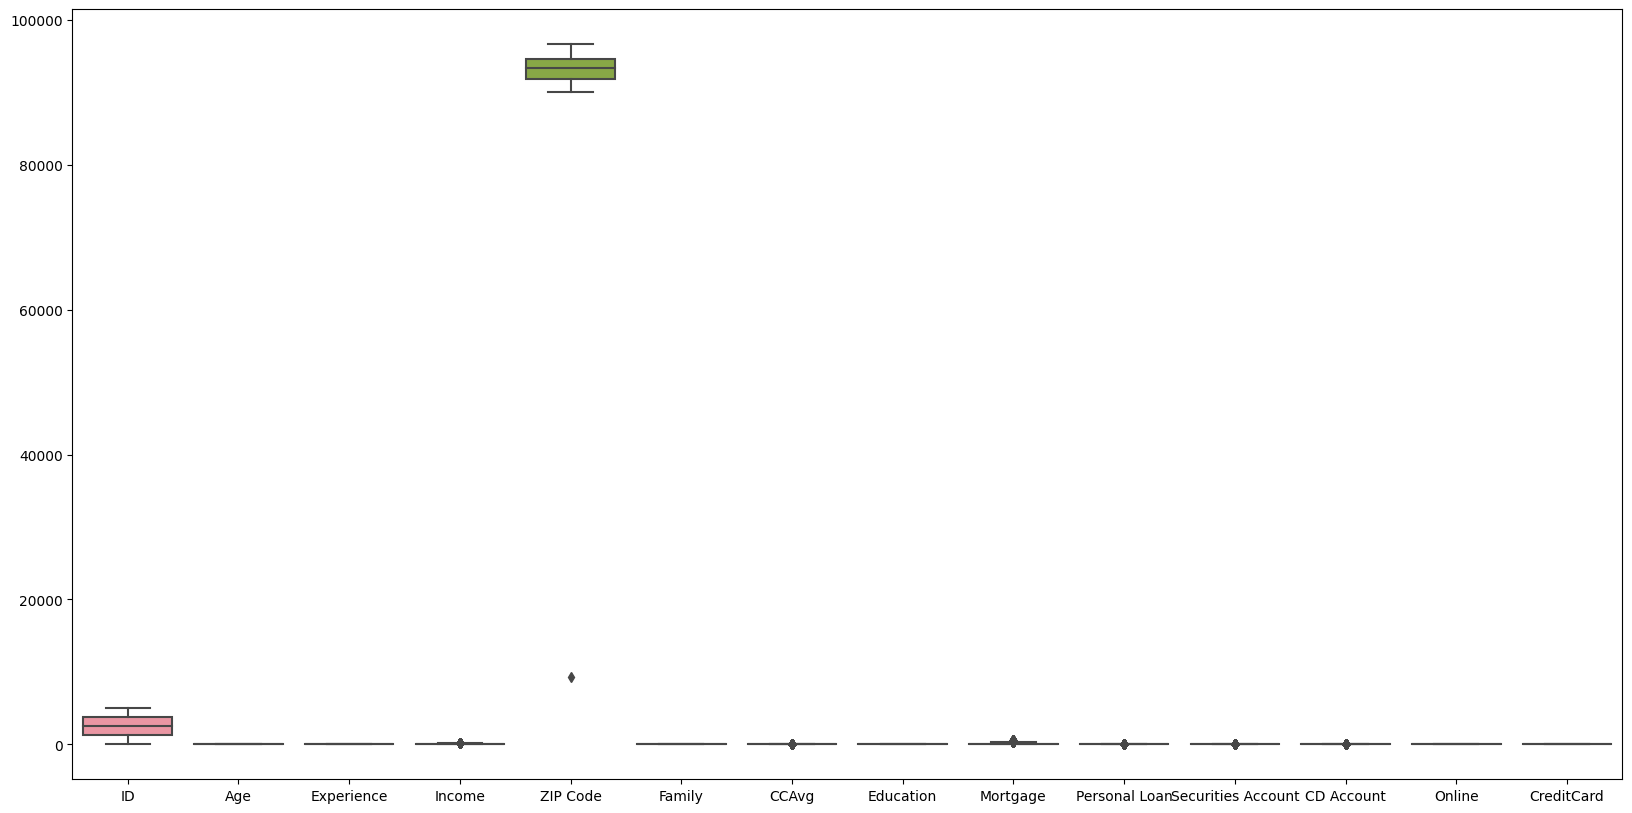

In [21]:
sn.boxplot(df)

### Zip COde and ID makes the box plot un recognizable to detect the outlier.
### So dropping those coloumn and check the outliers once again.

<Axes: >

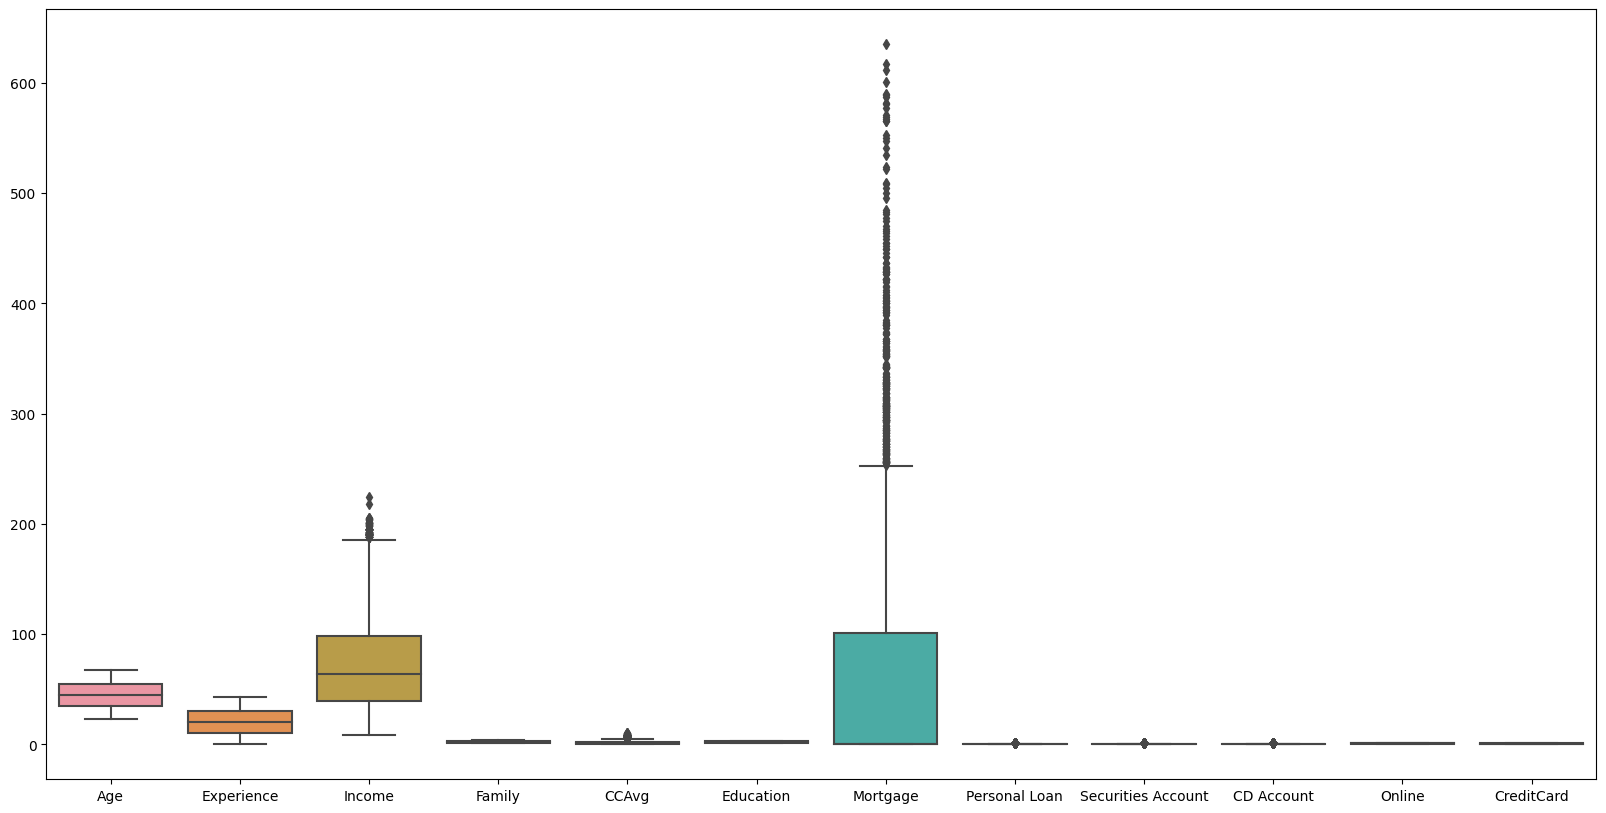

In [22]:
sn.boxplot(df.drop(['ID','ZIP Code'],axis=1))

In [23]:
# Income and mortgage have a handful of outliers.
# Chekcing Outliers for Income features.
i='Income'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Income outliers Count: 96


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
18,19,46,21,193,91604,2,8.100000,3,0,1,0,0,0,0
47,48,37,12,194,91380,4,0.200000,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.100000,3,240,1,0,0,1,0
59,60,31,5,188,91320,2,4.500000,1,455,0,0,0,0,0
303,304,49,25,195,95605,4,3.000000,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,4660,28,4,199,92121,1,6.333333,1,0,0,0,0,0,0
4670,4671,52,26,194,94305,1,1.700000,1,0,0,0,0,1,0
4895,4896,45,20,201,92120,2,2.800000,1,0,0,0,0,1,1
4981,4982,34,9,195,90266,2,3.000000,1,122,0,0,0,1,0


In [28]:
i='Mortgage'

Q1 = df[i].quantile(0.25)
Q3 = df[i].quantile(0.75)
IQR = Q3 - Q1
outliers =df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
print(i,'outliers Count:',outliers.shape[0])

outliers

Mortgage outliers Count: 291


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
22,23,29,5,62,90277,1,1.2,1,260,0,0,0,1,0
39,40,38,13,80,94115,4,0.7,3,285,0,0,0,1,0
42,43,32,7,132,90019,4,1.1,2,412,1,0,0,1,0
59,60,31,5,188,91320,2,4.5,1,455,0,0,0,0,0
66,67,62,36,105,95670,2,2.8,1,336,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,34,8,165,91107,1,7.0,3,541,1,0,0,0,0
4865,4866,50,24,133,90025,4,1.4,2,342,1,0,0,0,1
4899,4900,54,29,85,94928,4,1.3,3,299,0,0,0,1,0
4942,4943,52,26,109,94710,1,2.4,1,308,0,0,1,1,1


<Axes: xlabel='Income', ylabel='Personal Loan'>

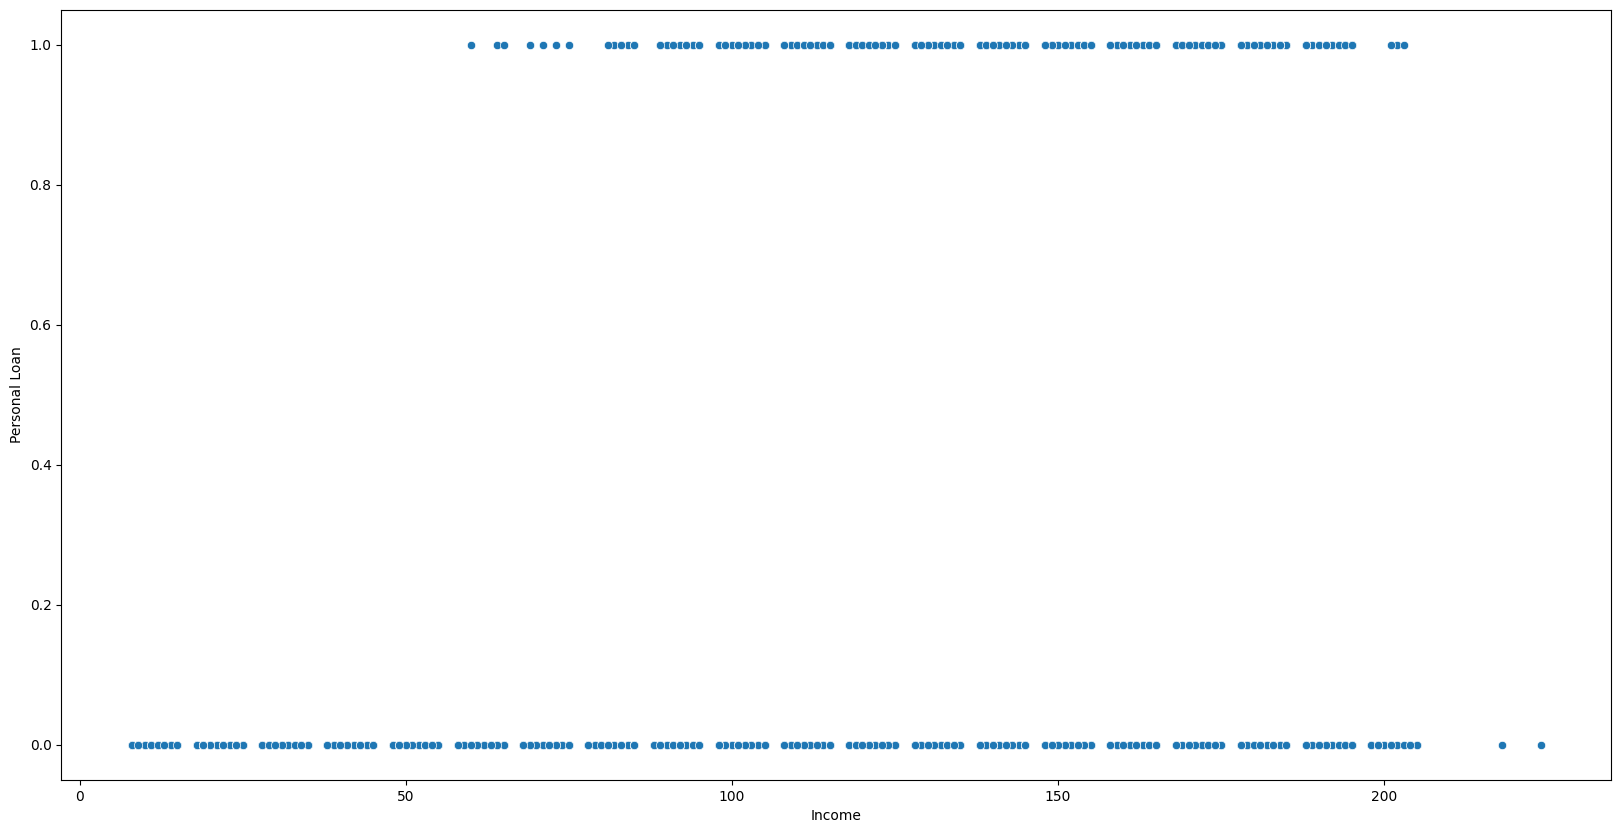

In [33]:
sn.scatterplot(x=df['Income'],
                y=df['Personal Loan'])

In [34]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)


In [35]:
df.drop(labels=[3896, 4993],axis=0,inplace=True)


In [36]:
# Data Final
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


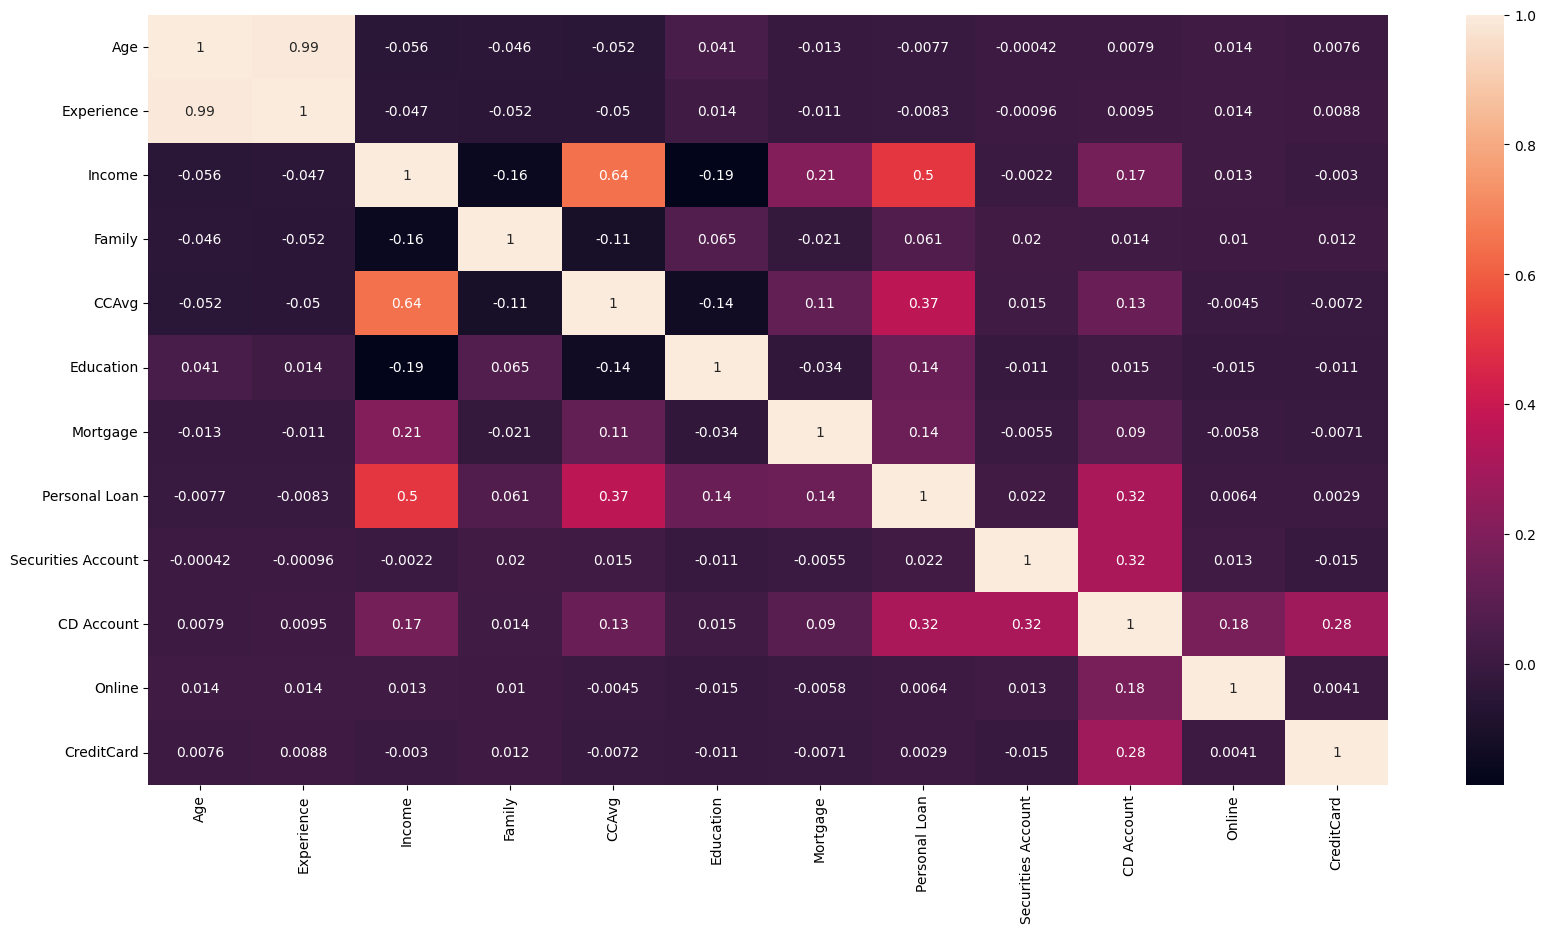

In [37]:
# See the power of relation between coleumns

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Income and Personal Load 0.5
## CCAVG and Personal loan 0.5
## CD Account and Personal load .32

In [38]:
X = df.drop('Personal Loan', axis=1)
Y = df['Personal Loan']

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, Y,  test_size=0.2, random_state=42
)

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       903
           1       0.78      0.58      0.66        97

    accuracy                           0.94      1000
   macro avg       0.87      0.78      0.82      1000
weighted avg       0.94      0.94      0.94      1000



In [51]:
def logistReg(x_test,y_test,x_train,y_train, model):
    # Fit the model on train
    #predict on test

    y_predict = model.predict(x_test)
    y_predictprob = model.predict_proba(x_test)

    coef_df = pd.DataFrame(model.coef_,columns=list(x_train.columns))
    coef_df['intercept'] = model.intercept_
    model_score = model.score(x_train, y_train)
    print(f"Accuracy of Training Data: {model_score}")
    model_score = model.score(x_test, y_test)
    print(f"Accuracy of Test Data: {model_score}")
    print(coef_df)
    print(metrics.classification_report(y_test,y_predict))
    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                      columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (8,5))
    sn.heatmap(df_cm, annot=True)
    plt.show()
    print("f1 score", metrics.f1_score(y_test,y_predict))
    print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))
    return y_predictprob,y_predict

Accuracy of Training Data: 0.9517258629314658
Accuracy of Test Data: 0.943
        Age  Experience    Income   Family    CCAvg  Education  Mortgage  \
0 -0.489941    0.497227  0.054456  0.70679  0.04531   1.670062  0.000408   

   Securities Account  CD Account    Online  CreditCard  intercept  
0           -0.381222    3.228114 -0.757897   -1.264924  -0.713064  
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       903
           1       0.78      0.58      0.66        97

    accuracy                           0.94      1000
   macro avg       0.87      0.78      0.82      1000
weighted avg       0.94      0.94      0.94      1000



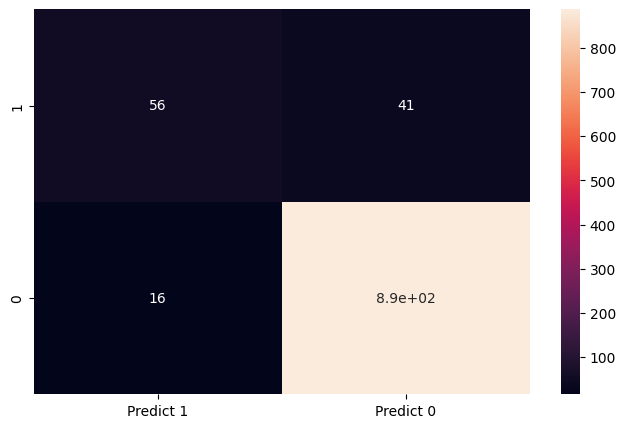

f1 score 0.6627218934911242
Auc Roc Score:  0.779800436117866


In [55]:
ypredictedprob, ypredict = logistReg(X_test, y_test, X_train, y_train, model)

# Decision tree Classifier

In [56]:
 from sklearn import tree

In [57]:
model1 = tree.DecisionTreeClassifier()

In [58]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6372767857142857, 0.9642857142857143, 'x[2] <= 114.5\ngini = 0.173\nsamples = 3998\nvalue = [3615, 383]'),
 Text(0.34598214285714285, 0.8928571428571429, 'x[4] <= 2.95\ngini = 0.04\nsamples = 3245\nvalue = [3178, 67]'),
 Text(0.0625, 0.8214285714285714, 'x[2] <= 106.5\ngini = 0.009\nsamples = 3003\nvalue = [2990, 13]'),
 Text(0.044642857142857144, 0.75, 'gini = 0.0\nsamples = 2902\nvalue = [2902, 0]'),
 Text(0.08035714285714286, 0.75, 'x[5] <= 1.5\ngini = 0.224\nsamples = 101\nvalue = [88, 13]'),
 Text(0.03571428571428571, 0.6785714285714286, 'x[3] <= 3.5\ngini = 0.078\nsamples = 49\nvalue = [47, 2]'),
 Text(0.017857142857142856, 0.6071428571428571, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.05357142857142857, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.125, 0.6785714285714286, 'x[4] <= 2.45\ngini = 0.334\nsamples = 52\nvalue = [41, 11]'),
 Text(0.08928571428571429, 0.6071428571428571, 'x[0] <= 33.5\ngini = 0.278\nsamples = 48\nvalue = [40

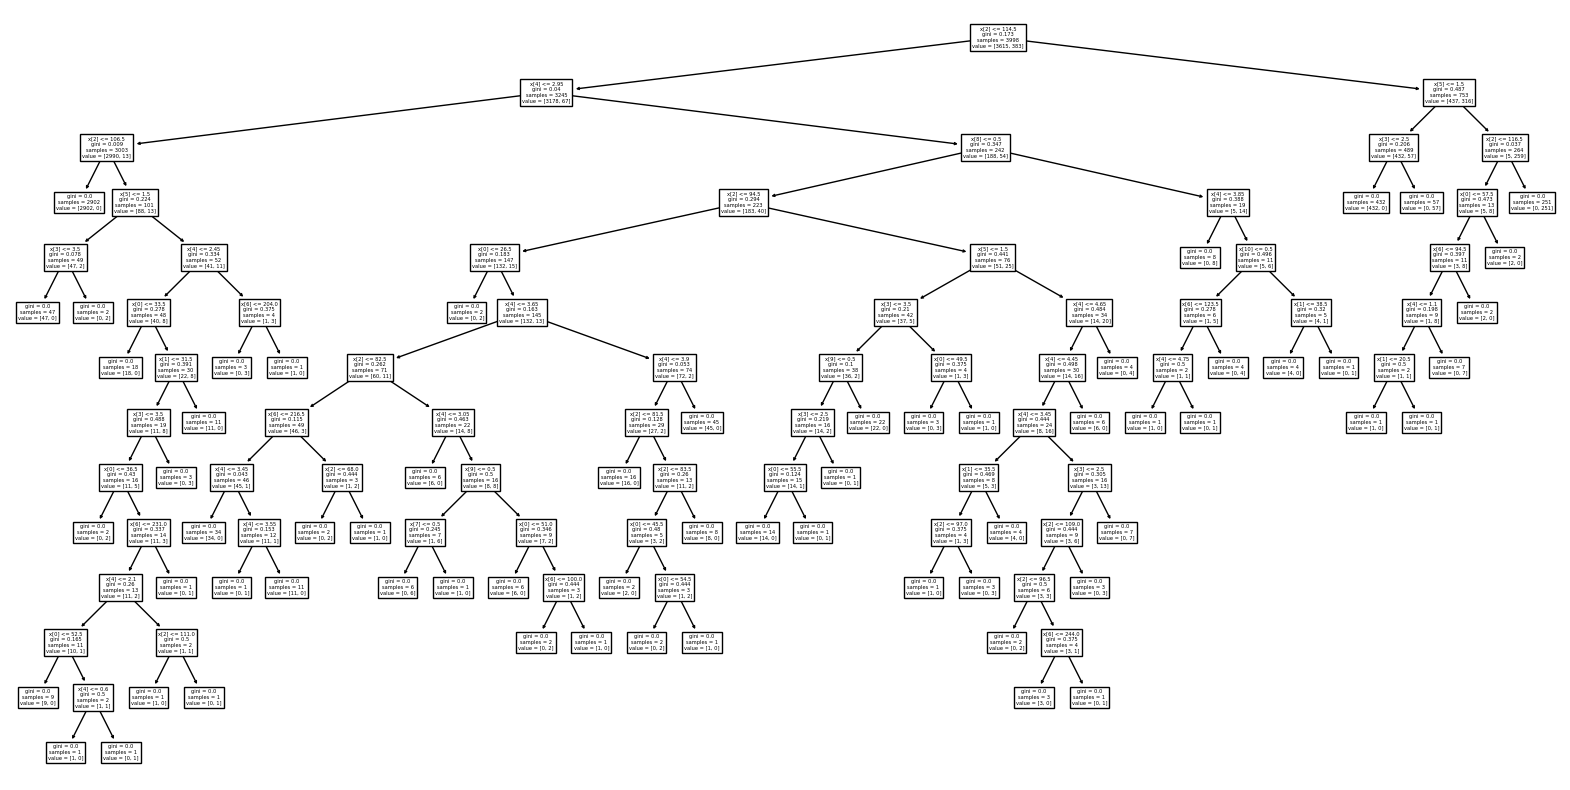

In [59]:
tree.plot_tree(model1)

In [60]:
y_predict= model1.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc= accuracy_score(y_test, y_predict)
print('Accuracy is ',acc*100)

Accuracy is  98.2


In [64]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.94      0.87      0.90        97

    accuracy                           0.98      1000
   macro avg       0.96      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



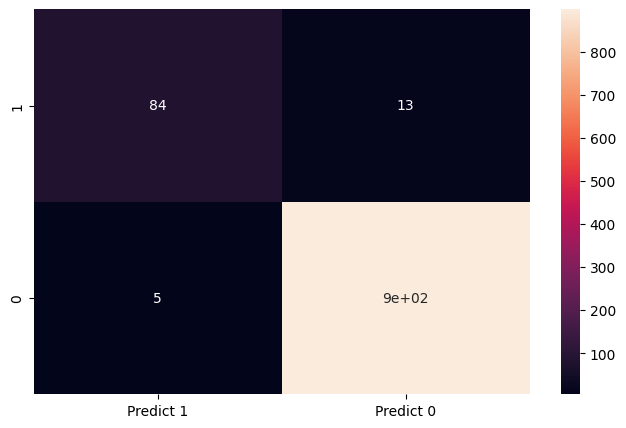

f1 score 0.9032258064516129
Auc Roc Score:  0.9302211414414723


In [65]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,5))
sn.heatmap(df_cm, annot=True)
plt.show()
print("f1 score", metrics.f1_score(y_test,y_predict))
print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))

We Should to target the client with:
1. higher income
2. higher Average Spend on Credit
3. certificates of deposit
4. professional education level
5. Ages of 25, [32 to 36], [63 to 65]
6. Family Size of 3 to have the highest chance of taking personal loan

